Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2    2017       Pune  06-04-2017               Mumbai Indians   
2   3    2017     Rajkot  07-04-2017                Gujarat Lions   
3   4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyder

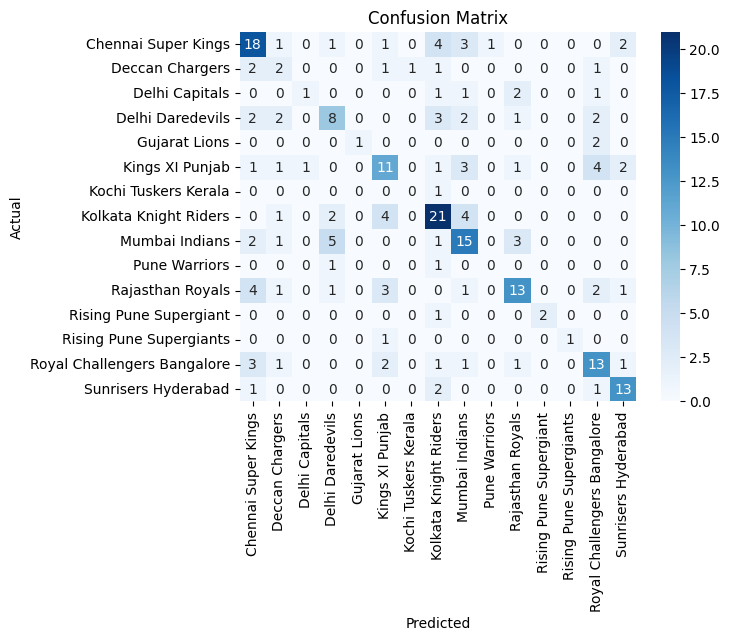

The predicted winner is: Mumbai Indians


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('matches.csv')

print("Dataset:")
print(df.head())

features = ['team1', 'team2', 'venue', 'toss_winner', 'toss_decision']
target = 'winner'

df.dropna(subset=features + [target], inplace=True)

df_encoded = pd.get_dummies(df[features + [target]])

X = df_encoded.drop(columns=['winner_' + team for team in df[target].unique()])
y = df_encoded[['winner_' + team for team in df[target].unique()]]

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_match = {
    'team1': 'Mumbai Indians',
    'team2': 'Chennai Super Kings',
    'venue': 'Wankhede Stadium',
    'toss_winner': 'Mumbai Indians',
    'toss_decision': 'bat'
}

new_match_encoded = pd.get_dummies(pd.DataFrame([new_match]), columns=features)
new_match_encoded = new_match_encoded.reindex(columns=X.columns, fill_value=0)

predicted_winner = clf.predict(new_match_encoded)
print(f"The predicted winner is: {predicted_winner[0]}")